In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [260]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 2/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt_ncnd = np.transpose(data['D'])[0]
fs_ncnd = int(1/data['Tinterval'][0][0])

In [261]:
nps_frac = 1
PSD_ncnd = scisig.welch(tt_ncnd, fs = fs_ncnd, nperseg = int(nps_frac*fs_ncnd))

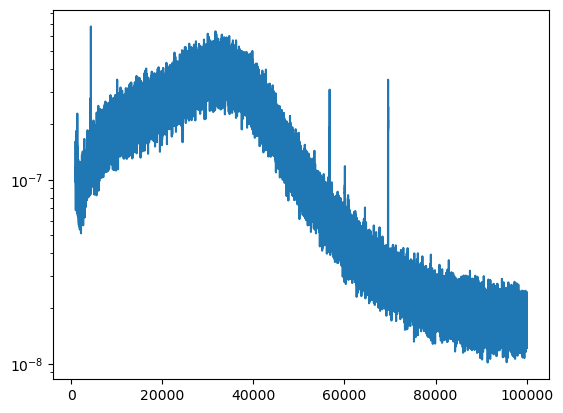

In [262]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.yscale('log')

In [263]:
lb = int(nps_frac*20000)
ub = int(nps_frac*120000)
fit_ncnd, cov_ncnd = opt.curve_fit(au.Linewidth2, PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], p0 = [10**12, 30000, 10000, 2*10**(-8)])
print(fit_ncnd)
fitted_ncnd = au.Linewidth2(PSD_ncnd[0], *fit_ncnd)

[3.00256378e+11 3.70218207e+04 2.53697511e+04 1.23257667e-08]


In [275]:
37000/30000

1.2333333333333334

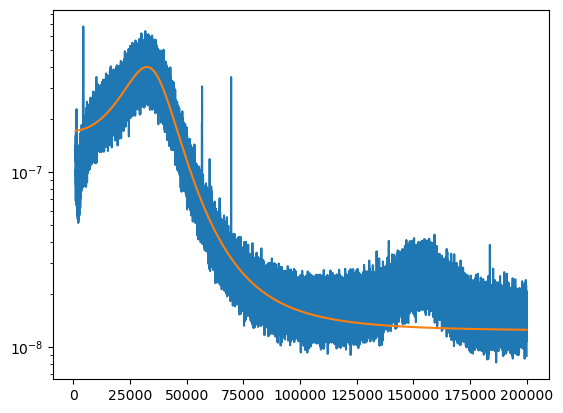

In [265]:
lb = int(nps_frac*1000)
ub = int(nps_frac*250000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.plot(PSD_ncnd[0][lb:ub], fitted_ncnd[lb:ub])
plt.yscale('log')

[2.09963618e+11 1.54077728e+05 2.64582966e+04 1.39644721e-08]


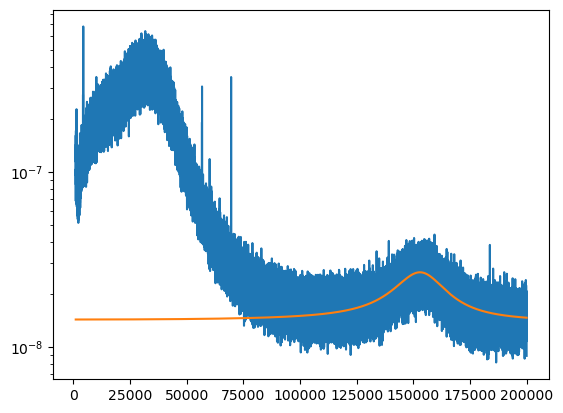

In [266]:
lb = int(nps_frac*125000)
ub = int(nps_frac*200000)
fit2, cov2 = opt.curve_fit(au.Linewidth2, PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], p0 = [0.5*10**12, 130000, 20000, 2*10**(-8)])
print(fit2)
fitted2 = au.Linewidth2(PSD_ncnd[0], *fit2)
lb = int(nps_frac*1000)
ub = int(nps_frac*250000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.plot(PSD_ncnd[0][lb:ub], fitted2[lb:ub])
plt.yscale('log')

In [237]:
130763*1.3/154000

1.1038435064935064

In [276]:
154000/130763

1.177703172915886

In [43]:
lb = int(nps_frac*15000)
ub = int(nps_frac*100000)
area_1 = np.trapz(PSD_ncnd[1][lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
lb = int(nps_frac*0)
ub = int(nps_frac*200000)
area_2 = np.trapz(fitted_ncnd[lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
print(area_1)
print(area_2)
# Use area_2 for uncalibrated variance of oscillator

0.11088872523380977
0.12127803799538193


In [44]:
# Let's make a graph of charge changes to put in presentation

In [20]:
filename = 'D:/Lab Data/diamond/240521/Charging/Particle 1/Before/Before_'
files = [1, 2, 3, 4, 5]
end = '.mat'

In [21]:
X = np.zeros(0)
theta = np.zeros(0)
HV = np.zeros(0)
for file in files:
    data = sio.loadmat(filename+str(file)+end)
    X = np.concatenate((X, np.transpose(data['E'])[0]))
    theta = np.concatenate((theta, np.transpose(data['F'])[0]))
    HV = np.concatenate((HV, np.transpose(data['G'])[0]))
time = np.linspace(0, len(X)*0.001, len(X))

Text(0, 0.5, 'Phase (V)')

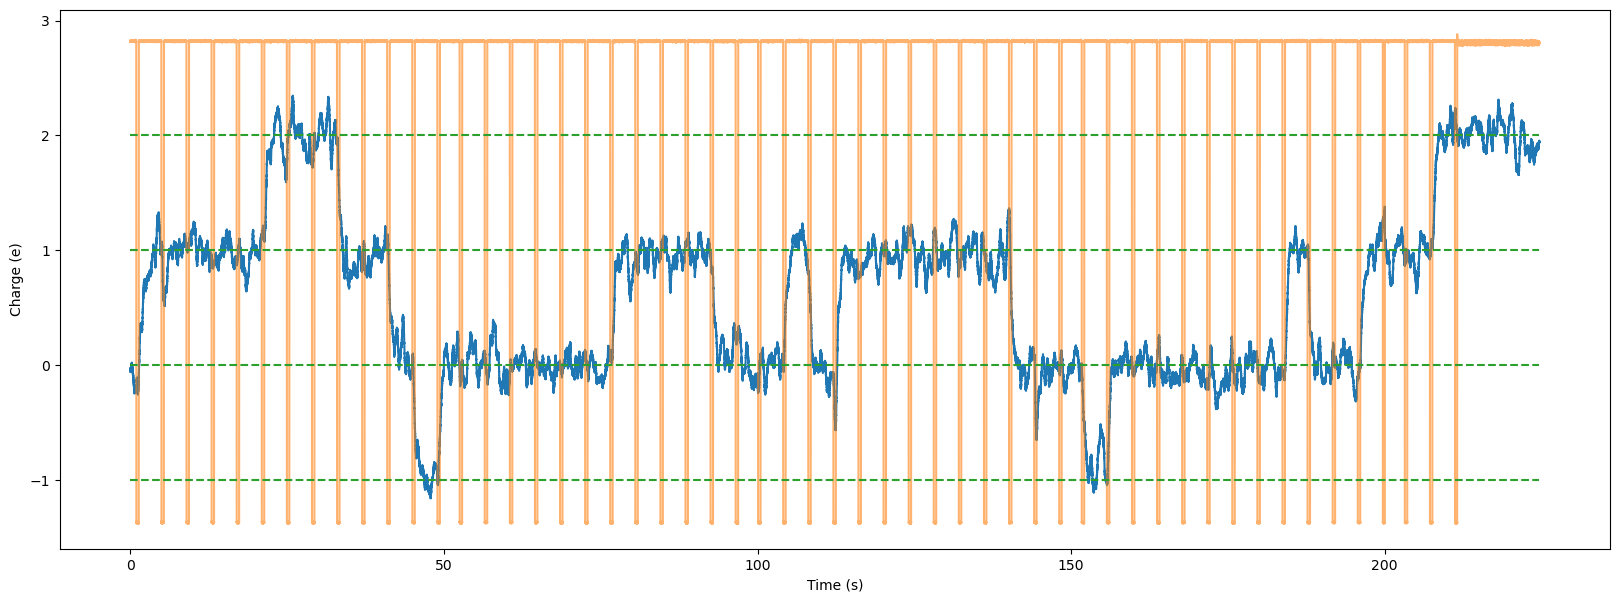

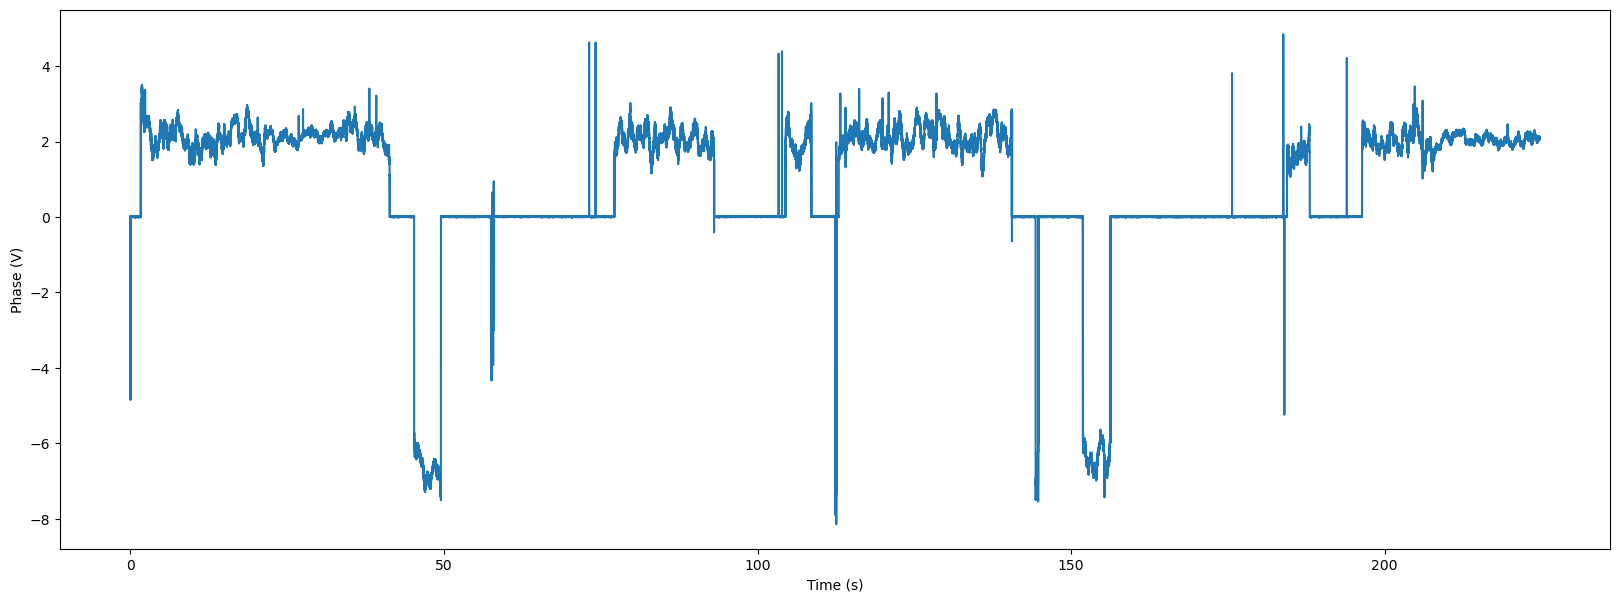

In [26]:
plt.figure(figsize = (20, 7))
plt.plot(time, X/0.06)
plt.plot(time, (HV/1+0.7)/0.25, alpha = 0.6)
plt.plot([time[0], time[-1]], [-1, -1], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [0.0, 0.0], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [1, 1], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [2, 2], 'tab:green', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Charge (e)')
plt.figure(figsize = (20, 7))
plt.plot(time, theta)
plt.xlabel('Time (s)')
plt.ylabel('Phase (V)')

In [1319]:
# So two charges on particle before frequency comb

In [45]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 4/'
data = sio.loadmat(filename + 'FreqComb.mat')
tt_fc = np.transpose(data['D'])[0]
drive_fc = np.transpose(data['G'])[0]
fs_fc = int(1/data['Tinterval'][0][0])

In [46]:
nps_frac = 1
PSD_fc= scisig.welch(tt_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))
PSD_drive_fc= scisig.welch(drive_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))

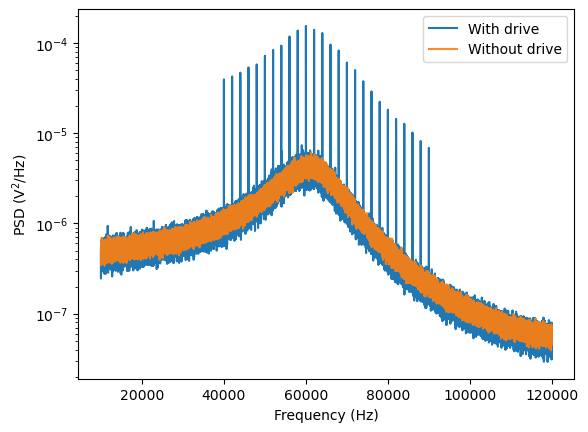

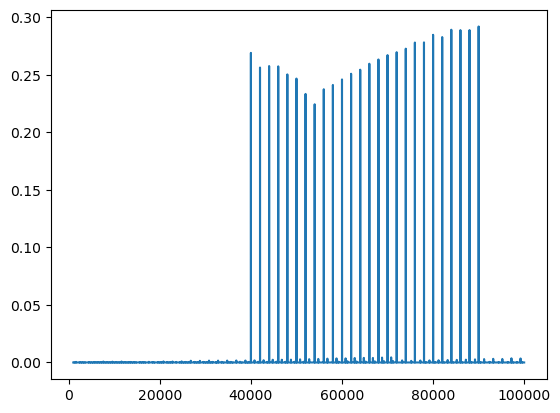

In [86]:
lb = int(nps_frac*10000)
ub = int(nps_frac*120000)
plt.figure()
plt.plot(PSD_fc[0][lb:ub], PSD_fc[1][lb:ub], label = 'With drive')
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], alpha = 0.9, label = 'Without drive')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.yscale('log')
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])

In [48]:
len(tt_fc)/fs_fc

22.53003

In [49]:
PSD_sin = scisig.welch(np.sin(2*np.pi*60000*np.linspace(0, len(tt_fc)/fs_fc, len(tt_fc))), fs = fs_fc, nperseg = int(nps_frac*fs_fc))

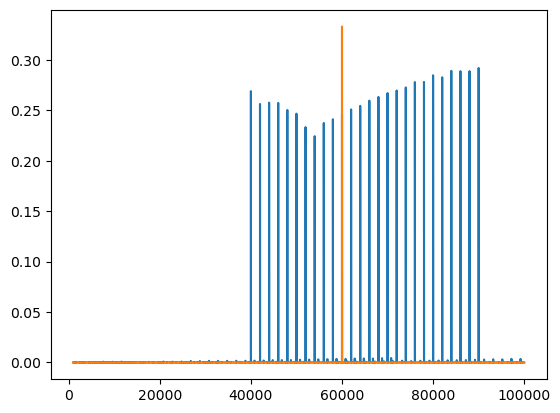

In [50]:

lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])
plt.plot(PSD_sin[0][lb:ub], PSD_sin[1][lb:ub])

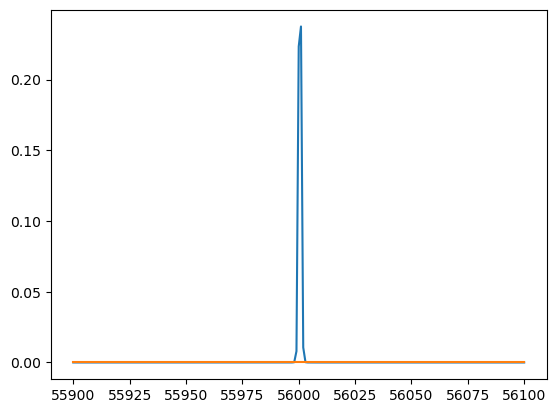

In [51]:
lb = int(nps_frac*56000)-100
ub = int(nps_frac*56000)+101
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])
plt.plot(PSD_sin[0][lb:ub], PSD_sin[1][lb:ub])

In [52]:
def Line(x, a, b):
    return a*x + b

def sum_and_fit(amp, data, freqs):
    ran = 50
    areal2 = []
    fit1l = []
    fit2l = []
    line11l = []
    line12l = []
    for n, j in enumerate(freqs):
        ran = ran
        areal = []
        j = int(j)
        for i in range(j-100, j+100):
            area = np.trapz(amp[j-100:i], data[j-100:i])
            areal.append(area)
        areal2.append(areal)
        fit1lin, cov1lin = opt.curve_fit(Line, data[j-100:j-20], areal[:80])
        fit2lin, cov2lin = opt.curve_fit(Line, data[j+20:j+100], areal[-80:])
        fit1l.append(fit1lin)
        fit2l.append(fit2lin)

        line1 = Line(data[j-100:j+100], fit1lin[0], fit1lin[1])
        line2 = Line(data[j-100:j+100], fit2lin[0], fit2lin[1])
        line11l.append(line1)
        line12l.append(line2)
        
    return areal2, fit1l, fit2l, line11l, line12l

In [56]:
freqs = np.linspace(40000*nps_frac, 90000*nps_frac, 26)
foo = sum_and_fit(PSD_fc[1], PSD_fc[0], freqs)
bar = sum_and_fit(PSD_drive_fc[1], PSD_drive_fc[0], freqs)

In [57]:
# for i in range(26):
#     plt.figure()
#     plt.plot(bar[0][i], 'o')
#     plt.plot(bar[3][i])
#     plt.plot(bar[4][i])

diff_l = []
for i in range(26):
    diff = foo[4][i][100] - foo[3][i][100]
    diff_l.append(diff)
    
diff_l2 = []
for i in range(26):
    diff = bar[4][i][100] - bar[3][i][100]
    diff_l2.append(diff)

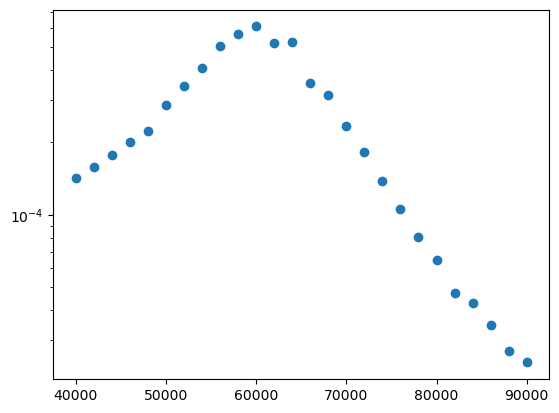

In [58]:
plt.plot(freqs, np.array(diff_l)/np.array(diff_l2), 'o')
plt.yscale('log')

In [59]:
importlib.reload(au)
fit_cp, cov_cp = opt.curve_fit(au.Linewidth, freqs/nps_frac, np.array(diff_l)/np.array(diff_l2)*0.5, p0 = [10**10, 30000, 10000]) # doing /areas_fc*0.5 normalizes everything to as if it was dirven by a 1V wave at each frequency so can assume 1V in the last step
fitted_cp = au.Linewidth(PSD_fc[0], *fit_cp)

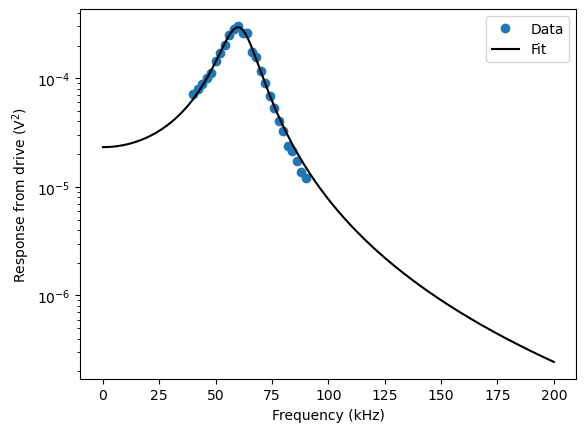

In [78]:
plt.plot(freqs/nps_frac/1000, np.array(diff_l)/np.array(diff_l2)*0.5, 'o', label = 'Data')
plt.plot(PSD_fc[0]/1000, fitted_cp, 'k', label = 'Fit')
plt.ylabel('Response from drive (V$^2$)')
plt.xlabel('Frequency (kHz)')
plt.yscale('log')
plt.legend()

In [61]:
print(fit_ncnd)
print(fit_cp)

[5.12851129e+12 6.17799568e+04 1.81787539e+04 1.35308232e-08]
[3.24461875e+14 6.11433002e+04 1.73343176e+04]


In [63]:
F0 = 122*3*1.6*10**(-19)*20 # 20 for amplifier
w0 = fit_ncnd[1]*2*np.pi
T = 293
kb = 1.38*10**(-23)

In [70]:
mass = F0**2*w0**2*area_2/(2*np.pi)**4/2/fit_cp[0]/T/kb
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3
mass/mass1

1.16330557896843

In [71]:
print(mass)

6.129702235029466e-18


In [66]:
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3
print(mass1*w0**2*area_1/kb/T)
print(2*mass1**2*fit_cp[0]*(2*np.pi)**4/F0**2)

21774148906971.848
20471145697637.71


In [67]:
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3

In [68]:
mass/mass1

1.16330557896843

In [87]:
1.45**2

2.1025

In [1070]:
np.sqrt(4/3*np.pi*2200*(83*10**(-9))**3*w0**2*area_1/kb/T)/10**6

2.825961093407782

In [802]:
freqs[10]*100

60000.0

In [703]:
fit_ncnd

array([1.32671178e+11, 3.03827369e+04, 2.08162777e+04, 1.03030906e-08])

In [705]:
k = 10
actual = (areas_resp[k]-areas_tf[k])*0.5/areas_fc[k]
w0**2*area_2*(F0)**2/(2*np.pi)**1/actual/2/kb/T/((fit_ncnd[1]**2-(freqs[k]*10)**2)**2 + (freqs[k]*10)**2*fit_ncnd[2]**2)

6.09412098150871e-21

In [459]:
mass1

5.269210726613231e-18

In [419]:
fit_ncnd[2]

18051.1697853283

In [270]:
w0 = 55000*2*np.pi # Natural frequency of oscillator
P = 6.1 # Pressure in mbar
T = 293 # Environmental temperature
R = (0.047)*10**(-6) # Particle Radius
p = 3500 # Particle Denisty
dtn = 1*10**(-8) # Timestep
M = 4/3*np.pi*R**3*p # Particle mass
print(M)
kb = 1.38*10**(-23) # Boltzmann constant
m = 29*1.67*10**(-27) # average mass of air particles
v = np.sqrt(8*1.38*10**(-23)*T/(np.pi*m)) # velocity of air particles
N0 = 2.43*10**(25) # Number density of air and ambient pressure
P0 = 1000 # Ambient pressure
N=N0*P/P0 # Number density of air at pressure P

y = (4/3*np.pi)*(m*v*N*R**2)/(M) # Damping from air
print(y)

1.5221246790103806e-18
20121.9864110609


In [274]:
w0 = 55000*2*np.pi # Natural frequency of oscillator
P = 6.1 # Pressure in mbar
T = 293 # Environmental temperature
R = (0.05)*10**(-6) # Particle Radius
Rt = R+0.015*10**(-6)
p = 3500 # Particle Denisty
pt = 800
M = 4/3*np.pi*R**3*p + 4/3*np.pi*(Rt**3-R**3)*pt # Particle mass
pbar = M/(4/3*np.pi*Rt**3) # Particle Denisty
dtn = 1*10**(-8) # Timestep
print(M)
kb = 1.38*10**(-23) # Boltzmann constant
m = 29*1.67*10**(-27) # average mass of air particles
v = np.sqrt(8*1.38*10**(-23)*T/(np.pi*m)) # velocity of air particles
N0 = 2.43*10**(25) # Number density of air and ambient pressure
P0 = 1000 # Ambient pressure
N=N0*P/P0 # Number density of air at pressure P

y = (4/3*np.pi)*(m*v*N*Rt**2)/(M) # Damping from air
print(y)

2.333993902106977e-18
25098.76539934936


In [200]:
q = R/Rt
eps = 5.7**2
eps2 = 30
e0 = 8.854*10**(-12)


In [205]:
np.sqrt(3*e0*4/3*np.pi*Rt**3*(eps2-1)/(eps2+1)*(1+q**3*(2*eps2+1)*(eps-eps2)/(eps+2*eps2)/(eps2-1))/(1+q**3*(2*eps2-2)*(eps-eps2)/(eps+2*eps2)/(eps2+2))/(3*e0*4/3*np.pi*R**3*(eps-1)/(eps+1))*(4/3*np.pi*R**3*p)/M)

1.3123326822456662

In [202]:
3*e0*4/3*np.pi*R**3*(eps-1)/(eps+1)

1.3077264497839622e-32

In [258]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 1/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt1 = np.transpose(data['D'])[0]
fs1 = int(1/data['Tinterval'][0][0])
nps_frac = 0.01
PSD1 = scisig.welch(tt1, fs = fs1, nperseg = int(nps_frac*fs1))

filename = 'D:/Lab Data/diamond/240521/Mass/Particle 2/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt2 = np.transpose(data['D'])[0]
fs2 = int(1/data['Tinterval'][0][0])
nps_frac = 0.01
PSD2 = scisig.welch(tt2, fs = fs2, nperseg = int(nps_frac*fs2))

filename = 'D:/Lab Data/diamond/240521/Mass/Particle 3/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt3 = np.transpose(data['D'])[0]
fs3 = int(1/data['Tinterval'][0][0])
nps_frac = 0.01
PSD3 = scisig.welch(tt3, fs = fs3, nperseg = int(nps_frac*fs3))

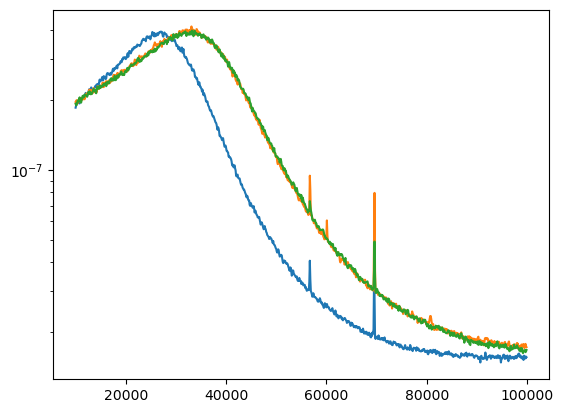

In [259]:
lb = int(nps_frac*10000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD1[0][lb:ub], PSD1[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub])
plt.plot(PSD3[0][lb:ub], PSD3[1][lb:ub])
plt.yscale('log')